<center><h1><b>4주차 ✅ 범죄자 특성 EDA</b></h1></center>

---
----

<center><h2><b>데이터 가져오기</b></h2></center>


In [51]:
# 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np

In [52]:
# 전체 열 보기
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [53]:
import glob

glob.glob('data/*')

['data/재범자_재범종류_및_기간_2011_2020.csv',
 'data/범죄_발생부터_검거까지의_기간_2011_2020.csv',
 'data/범죄자_범행시_전과_여부_및_횟수_20220603105708.csv']

In [550]:
# 데이터 로드
raw = pd.read_csv('data/재범자_재범종류_및_기간_2011_2020.csv', encoding='cp949')
raw.shape

(748, 14)

In [55]:
# 앞에
raw.head()

,죄종별(1),죄종별(2),재범종류별(1),재범기간별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,계,소계,계,계,822673,862625,871076,833458,844015,881941,796882,712811,701101,661301
1,계,소계,동종,계,292731,290881,293431,272582,271767,275237,248437,221167,210162,197950
2,계,소계,동종,1개월이내,13342,14843,13395,10983,11001,12206,10523,9997,9980,10643
3,계,소계,동종,3개월이내,19064,20221,17813,15180,15808,17481,15653,13945,13694,13604
4,계,소계,동종,6개월이내,17744,18613,18293,17767,17602,18912,17545,15457,14732,14132


In [56]:
# 뒤에
raw.tail()

,죄종별(1),죄종별(2),재범종류별(1),재범기간별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
743,기타범죄,소계,이종,6개월이내,2662,3055,3150,3365,3419,4264,3767,3223,3028,2930
744,기타범죄,소계,이종,1년이내,12238,12355,12751,14017,14339,18159,15681,13439,13213,12823
745,기타범죄,소계,이종,2년이내,9546,9025,8976,9943,10138,13213,11109,9896,9957,8728
746,기타범죄,소계,이종,3년이내,11552,11608,11894,10962,11043,15104,12400,10772,11255,10163
747,기타범죄,소계,이종,3년초과,46103,47207,48965,53901,55663,72444,62617,52836,55317,52819


In [57]:
# 컬럼명 확인
raw.columns

Index(['죄종별(1)', '죄종별(2)', '재범종류별(1)', '재범기간별(1)', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [58]:
# 컬럼명 변경
raw = raw.rename(columns={
    "죄종별(1)": "범죄종류", "죄종별(2)": "범죄명",
    "재범종류별(1)": "재범종류", "재범기간별(1)": "기간",})

# 바뀐 컬럼명 확인
raw.columns

Index(['범죄종류', '범죄명', '재범종류', '기간', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

---
----

<center><h2><b>Tidy Data 만들기</b></h2></center>


In [59]:
# Tidy Data 만들기!
df = pd.melt(raw, id_vars=['범죄종류', '범죄명', '재범종류', '기간'],
            var_name='연도', value_name='재범발생횟수')
df.head(10)

,범죄종류,범죄명,재범종류,기간,연도,재범발생횟수
0,계,소계,계,계,2011,822673
1,계,소계,동종,계,2011,292731
2,계,소계,동종,1개월이내,2011,13342
3,계,소계,동종,3개월이내,2011,19064
4,계,소계,동종,6개월이내,2011,17744
5,계,소계,동종,1년이내,2011,62707
6,계,소계,동종,2년이내,2011,38801
7,계,소계,동종,3년이내,2011,40255
8,계,소계,동종,3년초과,2011,100818
9,계,소계,이종,계,2011,529942


In [60]:
# 타입 확인
df.dtypes


범죄종류      object
범죄명       object
재범종류      object
기간        object
연도        object
재범발생횟수    object
dtype: object

In [61]:
# 연도, 발생횟수 수치형 데이터로 변경
# 발생횟수 같은 경우는 astype 을 이용하면 중간에 string 오류가 난다.
# downcast 하면 타입 변경 가능 -> 근데 결측치가 있어서 float
df['재범발생횟수'] = pd.to_numeric(df['재범발생횟수'], errors='coerce', downcast='integer')
df['재범발생횟수'].dtypes



dtype('float64')

In [62]:
# 결측치 확인
df.isnull().sum()

범죄종류        0
범죄명         0
재범종류        0
기간          0
연도          0
재범발생횟수    573
dtype: int64

In [63]:
# 결측치 변경
df['재범발생횟수'] = df['재범발생횟수'].fillna(0).astype(int)

In [64]:
# 결측치 변경 확인
df.isnull().sum()

범죄종류      0
범죄명       0
재범종류      0
기간        0
연도        0
재범발생횟수    0
dtype: int64

In [65]:
# 고유값 확인하기
for col in df.columns:
    print(col, ':', end = ' ')
    print(df[col].unique(), end = '\n\n')

범죄종류 : ['계' '강력범죄' '절도범죄' '폭력범죄' '지능범죄' '풍속범죄' '특별경제범죄' '마약범죄' '보건범죄' '환경범죄'
 '교통범죄' '노동범죄' '안보범죄' '선거범죄' '병역범죄' '기타범죄']

범죄명 : ['소계' '살인기수' '살인미수등' '강도' '강간·강제추행' '강간' '유사강간' '강제추행' '기타 강간·강제추행등' '방화'
 '상해' '폭행' '체포·감금' '협박' '약취·유인' '폭력행위등' '공갈' '손괴' '직무유기' '직권남용' '증수뢰' '통화'
 '문서·인장' '유가증권인지' '사기' '횡령' '배임' '성풍속범죄' '도박범죄']

재범종류 : ['계' '동종' '이종']

기간 : ['계' '1개월이내' '3개월이내' '6개월이내' '1년이내' '2년이내' '3년이내' '3년초과']

연도 : ['2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020']

재범발생횟수 : [822673 292731  13342 ...   8728  10163  52819]



In [66]:
# 소계 들어가는 행 삭제
drops_col = ['강력범죄', '지능범죄', '폭력범죄', '풍속범죄']
drops = ((df['범죄명'].str.contains('계')) & (df['범죄종류'] == drops_col[0])) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == drops_col[1])) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == drops_col[2])) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == drops_col[3])) |\
    df['범죄종류'].str.contains('계') | df['기간'].str.contains('계')
df = df[~drops]


In [ ]:
raw[(raw['범죄명'].str.contains('계')) & (raw['범죄종류'].isin(drops_col))]

In [67]:
df.tail()

,범죄종류,범죄명,재범종류,기간,연도,재범발생횟수
7475,기타범죄,소계,이종,6개월이내,2020,2930
7476,기타범죄,소계,이종,1년이내,2020,12823
7477,기타범죄,소계,이종,2년이내,2020,8728
7478,기타범죄,소계,이종,3년이내,2020,10163
7479,기타범죄,소계,이종,3년초과,2020,52819


In [68]:
# 소계 겹치지 않게 범죄명 변경
for col in df['범죄종류'].unique().tolist():
    if col not in drops_col:
        df.loc[df['범죄종류'] == col, '범죄명'] = col


In [69]:
# 제대로 변경 되었는지 확인
df.groupby(by=['범죄종류', '범죄명']).count()


재범종류   기간   연도  재범발생횟수
범죄종류   범죄명                                
강력범죄   강간            140  140  140     140
       강간·강제추행       140  140  140     140
       강도            140  140  140     140
       강제추행          140  140  140     140
       기타 강간·강제추행등   140  140  140     140
       방화            140  140  140     140
       살인기수          140  140  140     140
       살인미수등         140  140  140     140
       유사강간          140  140  140     140
교통범죄   교통범죄          140  140  140     140
기타범죄   기타범죄          140  140  140     140
노동범죄   노동범죄          140  140  140     140
마약범죄   마약범죄          140  140  140     140
병역범죄   병역범죄          140  140  140     140
보건범죄   보건범죄          140  140  140     140
선거범죄   선거범죄          140  140  140     140
안보범죄   안보범죄          140  140  140     140
절도범죄   절도범죄          140  140  140     140
지능범죄   문서·인장         140  140  140     140
       배임            140  140  140     140
       사기            140  140  140     140
       유가증권인지        140  140  140     140
       증수뢰           140  140  140     140
       직권남용          140  140  140     140
       직무유기          140  140  140     140
       통화            140  140  140     140
       횡령            140  140  140     140
특별경제범죄 특별경제범죄        140  140  140     140
폭력범죄   공갈            140  140  140     140
       상해            140  140  140     140
       손괴            140  140  140     140
       약취·유인         140  140  140     140
       체포·감금         140  140  140     140
       폭력행위등         140  140  140     140
       폭행            140  140  140     140
       협박            140  140  140     140
풍속범죄   도박범죄          140  140  140     140
       성풍속범죄         140  140  140     140
환경범죄   환경범죄          140  140  140     140

In [70]:
# 인덱스 재정의
df = df.reset_index(drop=True)
df.head()

,범죄종류,범죄명,재범종류,기간,연도,재범발생횟수
0,강력범죄,살인기수,동종,1개월이내,2011,1
1,강력범죄,살인기수,동종,3개월이내,2011,2
2,강력범죄,살인기수,동종,6개월이내,2011,1
3,강력범죄,살인기수,동종,1년이내,2011,4
4,강력범죄,살인기수,동종,2년이내,2011,1


In [71]:
# 컬럼 재정렬
cols = ['범죄명', '연도', '기간', '재범종류', '범죄종류', '재범발생횟수', ]
df = df[cols]


In [72]:
# 데이터 저장
df.to_csv('output/04_재범종류_및_기간_2011_2020.csv', index=False)


In [73]:
df.shape

(5460, 6)

---
----

<center><h2><b>데이터 요악 통계</b></h2></center>


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
# 요약 통계
# 5460 개의 행
# 6개의 컬럼
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     5460 non-null   object
 1   연도      5460 non-null   object
 2   기간      5460 non-null   object
 3   재범종류    5460 non-null   object
 4   범죄종류    5460 non-null   object
 5   재범발생횟수  5460 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 256.1+ KB


In [75]:
# 수치형 데이터
df.describe()


,재범발생횟수
count,5460.000000
mean,1462.982234
std,5480.433830
min,0.000000
25%,8.000000
50%,90.000000
75%,767.000000
max,97082.000000


In [76]:
# 범주형 데이터
# 살인기수에 해당하는 범죄가 재범율이 높다.
# 기간은 1개월 이내
df.describe(include='object')

,범죄명,연도,기간,재범종류,범죄종류
count,5460,5460,5460,5460,5460
unique,39,10,7,2,15
top,살인기수,2011,1개월이내,동종,강력범죄
freq,140,546,780,2730,1260


In [83]:
# 한글 꺠짐 폰트 설정
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")


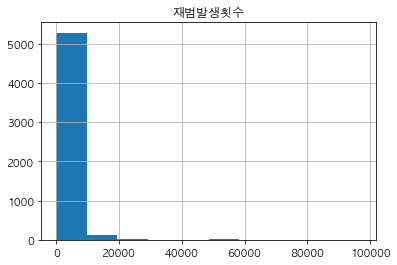

In [87]:
_ = df.hist()

In [99]:
pd.crosstab(index=[df['연도'], df['범죄명']], columns=df['재범종류'],
                     values=df['재범발생횟수'], aggfunc='sum')

재범종류             동종     이종
연도   범죄명                  
2011 강간           0      0
     강간·강제추행   1476   6848
     강도         913   2317
     강제추행         0      0
     공갈         512   1437
...             ...    ...
2020 폭력행위등     4111   8388
     폭행       20595  49925
     협박        1780   9601
     환경범죄       587   2321
     횡령        2272  10997

[390 rows x 2 columns]

<AxesSubplot:>

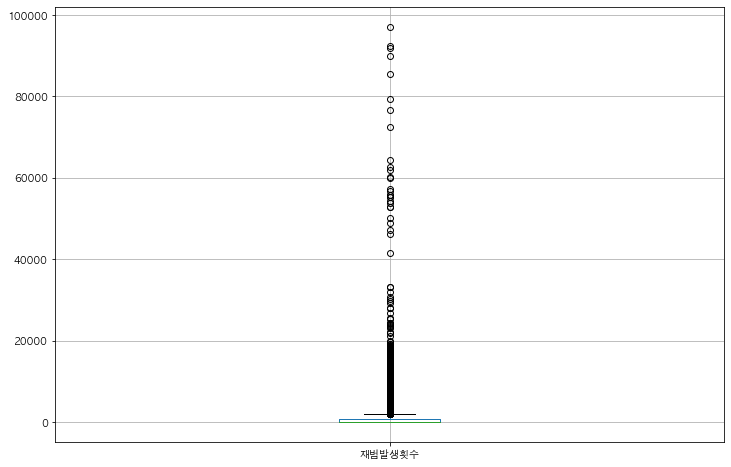

In [101]:
df.boxplot(figsize=(12, 8))

---
----

<center><h2><b>데이터 시각화</b></h2></center>


In [106]:
# 연도별 재범발생횟수
df.groupby('연도').sum()

,재범발생횟수
연도,
2011,822673
2012,862625
2013,871076
2014,833458
2015,844015
2016,881941
2017,796882
2018,712811
2019,701101


In [105]:
# 2016년에 재범이 가장 많이 발생했음을 알 수 있음.
px.histogram(df, x='연도', y='재범발생횟수'
            ,color='연도'
            ,text_auto=True
            ,title='연도별 재범발생횟수')

In [110]:
# 연도별 범죄에 따른 평균 재범발생횟수
df.groupby(by=['연도', '범죄명']).mean()

재범발생횟수
연도   범죄명                 
2011 강간          0.000000
     강간·강제추행   594.571429
     강도        230.714286
     강제추행        0.000000
     공갈        139.214286
...                   ...
2020 폭력행위등     892.785714
     폭행       5037.142857
     협박        812.928571
     환경범죄      207.714286
     횡령        947.785714

[390 rows x 1 columns]

In [251]:
# 연도별 범죄의 재범발생횟수는 비슷한 양상을 띄고 있다.
px.line(df, x='범죄명', y='재범발생횟수', color='연도'
        ,facet_col='연도'
        ,facet_col_wrap=2
        ,width=800, height=1000
        ,title='연도별 범죄에 따른 재범발생횟수 라인 그래프')

In [530]:
same = df[df['재범종류'] == '동종'].sort_values('재범발생횟수', ascending=False)
same.head()

,범죄명,연도,기간,재범종류,범죄종류,재범발생횟수
1560,교통범죄,2013,3년초과,동종,교통범죄,61997
2652,교통범죄,2015,3년초과,동종,교통범죄,60057
2106,교통범죄,2014,3년초과,동종,교통범죄,59898
3198,교통범죄,2016,3년초과,동종,교통범죄,56686
1014,교통범죄,2012,3년초과,동종,교통범죄,55675


In [531]:
px.histogram(same, x='범죄명', y='재범발생횟수'
                ,title='범죄에 따른 재범발생횟수'
                ,text_auto=True)

### 2020년 - 전체

In [354]:
# 2020년
_2020 = df[df['연도'] == '2020'].copy()
_2020.head()

,범죄명,연도,기간,재범종류,범죄종류,재범발생횟수
4914,살인기수,2020,1개월이내,동종,강력범죄,1
4915,살인기수,2020,3개월이내,동종,강력범죄,0
4916,살인기수,2020,6개월이내,동종,강력범죄,0
4917,살인기수,2020,1년이내,동종,강력범죄,4
4918,살인기수,2020,2년이내,동종,강력범죄,1


In [469]:
# 2020년 범죄명 기준
_2020.groupby('범죄명').sum().sort_values('재범발생횟수', ascending=False).head(10)

,재범발생횟수
범죄명,
교통범죄,143499
기타범죄,109745
사기,97665
폭행,70520
절도범죄,56375
특별경제범죄,32086
상해,28646
손괴,22815
도박범죄,13902


In [342]:
# 범죄명으로 봤을 때는 교통범죄가 가장 많다.
px.histogram(_2020, x='범죄명', y='재범발생횟수', color='범죄종류'
            ,width=800, height=600
            ,text_auto=True
            ,title='2020년 범죄에 따른 재범발생횟수')

In [343]:
# 범죄종류로 묶었을 때는 폭력범죄가 재범발생횟수가 가장 많다.
# 그 다음 교통범죄가 따른다.
fig = px.pie(_2020, values='재범발생횟수'
            ,names='범죄종류'
            ,title='2020년 범죄종류별 재범발생횟수')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [353]:
# 범죄종류에 따른 재범종류
# 보통 재범 발생시 이종 재범률이 높다.
fig = px.sunburst(_2020, path=['범죄종류', '재범종류']
                 ,values='재범발생횟수'
                 ,title='2020년 범죄종류에 따른 동종/이종 재범률')
fig.update_traces(
    textinfo='value+label'
    ,textfont={'size':15}
    ,texttemplate='<b>%{label}</b><br>%{percentRoot}<br>%{value}'
    ,insidetextorientation='horizontal'
    )
fig.show()

In [538]:
px.histogram(df, x='기간', y='재범발생횟수', text_auto=True)

### 2020년 - 폭력범죄

In [352]:
# 재범발생횟수가 가장 많은 폭력범죄를 추출
violence = _2020[_2020['범죄종류'] == '폭력범죄']
violence

,범죄명,연도,기간,재범종류,범죄종류,재범발생횟수
5054,상해,2020,1개월이내,동종,폭력범죄,252
5055,상해,2020,3개월이내,동종,폭력범죄,472
5056,상해,2020,6개월이내,동종,폭력범죄,584
5057,상해,2020,1년이내,동종,폭력범죄,1816
5058,상해,2020,2년이내,동종,폭력범죄,1226
...,...,...,...,...,...,...
5161,손괴,2020,6개월이내,이종,폭력범죄,742
5162,손괴,2020,1년이내,이종,폭력범죄,2686
5163,손괴,2020,2년이내,이종,폭력범죄,2189
5164,손괴,2020,3년이내,이종,폭력범죄,2245


In [359]:
# 폭력범죄를 범죄명을 기준으로 재범종류를 살펴본다.
pd.pivot_table(violence, index=['범죄명'], columns=['재범종류'], values=['재범발생횟수'])

재범발생횟수             
재범종류            동종           이종
범죄명                            
공갈       69.000000   159.428571
상해     1248.000000  2844.285714
손괴      489.428571  2769.857143
약취·유인     2.285714    14.571429
체포·감금    17.142857    86.285714
폭력행위등   587.285714  1198.285714
폭행     2942.142857  7132.142857
협박      254.285714  1371.571429

In [460]:
# 폭행범죄는 보통 동종의 재범률이 높다.
fig = px.histogram(violence, x='범죄명', y='재범발생횟수'
            ,color='재범종류'
            # ,facet_col='재범종류'
            ,barmode='group'
            ,text_auto=True
            # ,histfunc='avg'
            ,title='2020년 (폭력범죄) 범죄에 따른 재범종류')
fig.update_traces(
    texttemplate='%{y:d}명'
    ,textposition='auto'
)
fig.show()

In [463]:
# 폭력범죄는 1년이내 혹은 3년 초과가 많다.
fig = px.histogram(violence, x='기간', y='재범발생횟수'
                ,color='기간'
                ,text_auto=True
                # ,facet_col='기간'
                # ,facet_col_wrap=2
                ,title='2020년 (폭력범죄) 기간에 따른 재범발생횟수')
fig.update_traces(
    texttemplate='%{y:d}명'
    ,textposition='auto'
)
fig.show()

In [476]:
# 폭력범죄에서 1개월이내는 동종의 범죄를 저지른다.
# 1개월이 초과되면 이종의 범죄를 저지른다.
# 3년 초과시에는 다른 종류의 범죄를 저지르는 것을 볼 수 있다.
# 약간 폭력범죄라는 것이 범죄로 빠지는 게이트인가?
fig = px.histogram(violence, x='기간', y='재범발생횟수'
                ,color='재범종류'
                ,text_auto=True
                ,barmode='group'
                ,title='2020년 (폭력범죄) 기간에 따른 재범발생횟수')
fig.update_traces(
    texttemplate='%{y:d}명'
    ,textposition='outside'
)
fig.show()

### 2020년 - 지능범죄

In [480]:
scam = _2020[_2020['범죄종류'] == '지능범죄']
scam.head()

,범죄명,연도,기간,재범종류,범죄종류,재범발생횟수
5166,직무유기,2020,1개월이내,동종,지능범죄,0
5167,직무유기,2020,3개월이내,동종,지능범죄,0
5168,직무유기,2020,6개월이내,동종,지능범죄,0
5169,직무유기,2020,1년이내,동종,지능범죄,0
5170,직무유기,2020,2년이내,동종,지능범죄,0


In [486]:
# 지능범죄의 대부분은 사기가 담당하고 있다.
fig = px.histogram(scam, x='범죄명', y='재범발생횟수', color='범죄명'
                ,text_auto=True
                ,title='2020년 (지능범죄) 범죄에 따른 재범발생횟수')
fig.update_traces(
    texttemplate="%{y:d}명"
)
fig.show()

In [490]:
# 사기범죄에서 재범이 발생한다면 이종 재범률이 높다.
# 사기는 나름 비등비등하다.
fig = px.histogram(scam, x='범죄명', y='재범발생횟수', color='재범종류',
                   text_auto=True, barmode='group'
                    ,title='2020년 (지능범죄) 범죄에 따른 재범발생횟수')
fig.update_traces(
    texttemplate='%{y:d}명', textposition='outside'
)
fig.show()


In [536]:
px.pie(scam[scam['범죄명'] == '사기'], names='재범종류', values='재범발생횟수', title='사기범죄 재범종류 비율', width=800)

In [492]:
# 사기범죄에서는 1년이 모자르면 동종의 범죄를 잘 저지른다.
# 사기범죄는 동종의 범죄를 저지르는 데 유혹이 약한가?
fig = px.histogram(scam, x='기간', y='재범발생횟수', color='재범종류',
                   text_auto=True, barmode='group', title='2020년 (지능범죄) 기간에 따른 재범발생횟수')
fig.update_traces(
    texttemplate='%{y:d}명', textposition='outside'
)
fig.show()


### 2020년 - 강력범죄

In [496]:
crime = _2020[_2020['범죄종류'] == '강력범죄']
crime.head()

,범죄명,연도,기간,재범종류,범죄종류,재범발생횟수
4914,살인기수,2020,1개월이내,동종,강력범죄,1
4915,살인기수,2020,3개월이내,동종,강력범죄,0
4916,살인기수,2020,6개월이내,동종,강력범죄,0
4917,살인기수,2020,1년이내,동종,강력범죄,4
4918,살인기수,2020,2년이내,동종,강력범죄,1


In [506]:
# 강제추행과 강간의 이상치가 존재한다.
px.box(crime, x='범죄명', y='재범발생횟수'
            ,title='2020년 (강력범죄) 범죄명에 따른 재범발생횟수 boxplot')

In [510]:
px.histogram(crime, x='범죄명', y='재범발생횟수'
                ,text_auto=True
                ,title='2020년 (강력범죄) 범죄에 따른 재범발생횟수')

In [512]:
# 강력범죄에서 이종의 재범률이 높다.
fig = px.histogram(crime, x='범죄명', y='재범발생횟수', color='재범종류',
                   text_auto=True, barmode='group', title='2020년 (강력범죄) 범죄에 따른 재범발생횟수')
fig.update_traces(
    texttemplate='%{y:d}명', textposition='outside'
)
fig.show()


In [514]:
# 보통 이종의 범죄를 저지른다.
fig = px.histogram(crime, x='기간', y='재범발생횟수', color='재범종류',
                   text_auto=True, barmode='group', title='2020년 (강력범죄) 기간에 따른 재범발생횟수')
fig.update_traces(
    texttemplate='%{y:d}명', textposition='outside'
)
fig.show()
